# Midterm Requirements

Part I. 

Implement the following activity to Flask:

1. KNN  ~ classify Jobs

2. K-Means ~ cluster Jobs

3. NBayes Methods [Gaussian, MultiNomial, Bernoulli] ~ classify jobs & compare the accuracy  

4. Linear Regression (Given) ~ Salary Estimation

In [1]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset using pandas
df = pd.read_csv(r"C:\Users\kjson\Desktop\Midterm Requirements\Data Mining\final_data.csv")

# Split the dataset into features and target
X = df.drop('Job Level', axis=1)
y = df['Job Level']


In [3]:
from imblearn.over_sampling import RandomOverSampler

In [4]:
# Oversample the minority class using RandomOverSampler because of little data in the CTO level
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Classify using  KNN

In [5]:
# import knn model
from sklearn.neighbors import KNeighborsClassifier

In [6]:
# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Unique predicted labels:", set(y_pred))

Accuracy: 0.71875
Unique predicted labels: {1, 2, 3, 4}


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0  2  0]
 [ 0  5  0  0]
 [ 0  3  2  2]
 [ 0  2  0  6]]


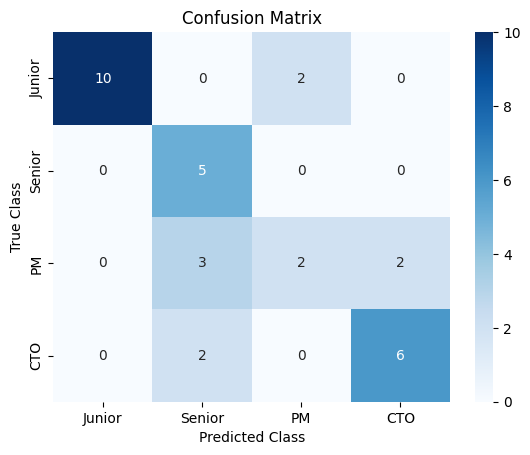

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# define the label names
label_names = ['Junior', 'Senior', 'PM', 'CTO']

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
# Add labels and title to the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

Dump the model using pickle

In [9]:
import pickle

# Dump the model to pickle
filename = 'knn_model.pkl'
with open(filename, 'wb') as f:
    pickle.dump(knn, f)

# Cluster Jobs using Kmeans

In [10]:
#import Kmeans model
from sklearn.cluster import KMeans

In [11]:
# select the features for clustering
X = df[['Experience Required', 'Salary']]

# initialize the KMeans object with the number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# fit the data to the KMeans algorithm
kmeans.fit(X)

# retrieve the labels
labels = kmeans.labels_

# add the cluster labels to the DataFrame
df['Cluster'] = labels

# create a dictionary to map cluster labels to job levels
cluster_map = {1: 'Junior', 2: 'Senior', 3: 'Project Manager', 4: 'CTO'}

# apply the mapping to create a new column for predicted job level
df['Predicted Job Level'] = df['Cluster'].map(cluster_map)

c:\Users\kjson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


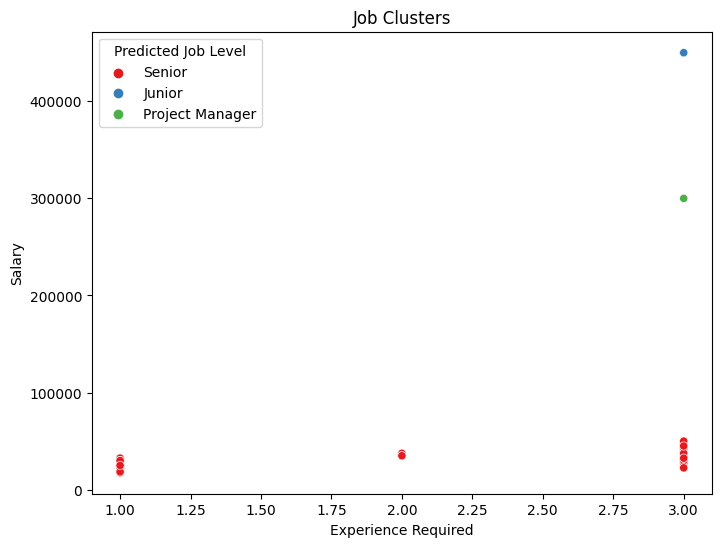

In [12]:
# create a scatter plot to visualize the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='Experience Required', y='Salary', hue='Predicted Job Level', data=df, palette='Set1')
plt.title('Job Clusters')
plt.show()

In [13]:
# dump the model to pickle
filename = 'kmeans_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(kmeans, file)

# Classify Jobs using Nbayes Methods

- Nbayes Gaussian

In [14]:
#import Nbayes Gaussian Model
from sklearn.naive_bayes import GaussianNB

In [15]:
# load model
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.65625


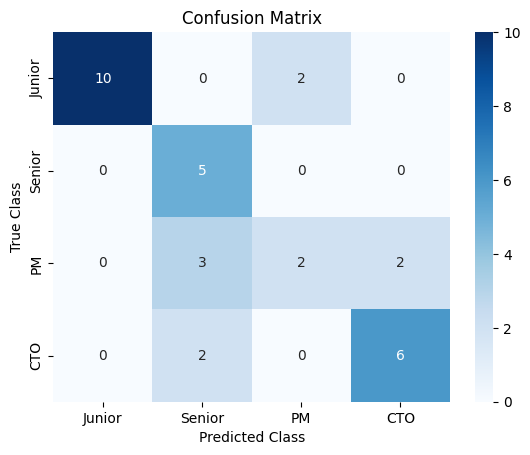

In [16]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# define the label names
label_names = ['Junior', 'Senior', 'PM', 'CTO']

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)

# Add labels and title to the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [17]:
# dump model
filename = 'gaussian_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(gnb, file)

# -Nbayes Multinomial

In [18]:
#import Nbayes Gaussian Model
from sklearn.naive_bayes import MultinomialNB

In [19]:
# Train the Multinomial Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb.predict(X_test)

# Test the model
accuracy = nb.score(X_test, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.3125


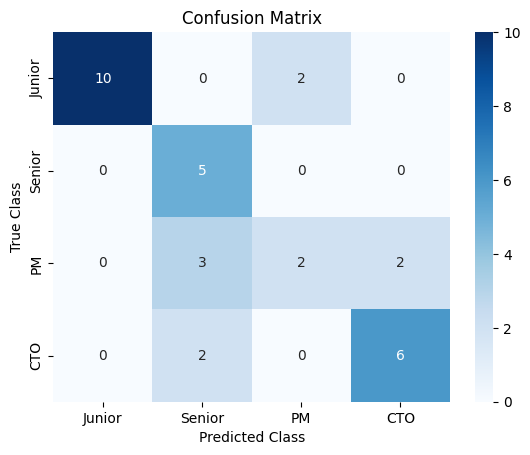

In [20]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# define the label names
label_names = ['Junior', 'Senior', 'PM', 'CTO']

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)

# Add labels and title to the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [21]:
# dump model
filename = 'multinomial_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(nb, file)

# - Nbayes Bernouli

In [22]:
# import Bernouli model
from sklearn.naive_bayes import BernoulliNB

In [23]:
# Train the Bernoulli Naive Bayes classifier
nb = BernoulliNB()
nb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.15625


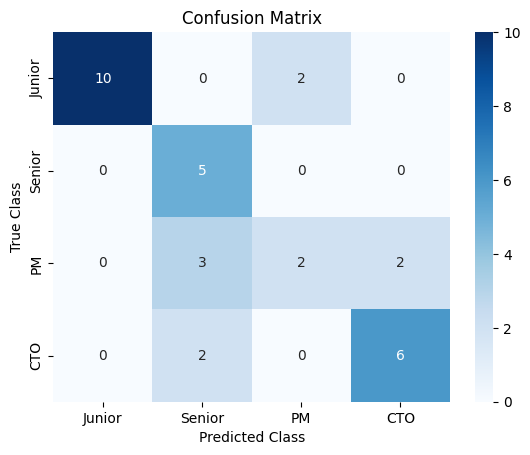

In [24]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# define the label names
label_names = ['Junior', 'Senior', 'PM', 'CTO']

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)

# Add labels and title to the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [25]:
# dump model
filename = 'bernouli_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(nb, file)

# Linear Regression -  Salary Estimation


In [26]:
import numpy as np

In [27]:
df = pd.read_csv(r"C:\Users\kjson\Desktop\Midterm Requirements\Data Mining\final_data.csv")

X = df.iloc[:,0:2] # job level and experience
y = df.iloc[:,-1] # target salary


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

X_train = np.array(X_train).reshape((len(X_train),2))
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape((len(X_test),2))
y_test = np.array(y_test).reshape((len(y_test),1))


In [28]:
#import linear regression model
from sklearn import linear_model

In [29]:
# train model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
lr.intercept_

array([-3583.64868729])

In [31]:
lr.coef_

array([[ 47143.70977434, -15868.80726911]])

In [32]:
lr.score(X_train,y_train)

0.26950879368809644

In [33]:
y_pred = lr.predict(X_test)
y_pred

array([[90241.05882841],
       [27691.25381794],
       [90241.05882841],
       [90241.05882841],
       [27691.25381794],
       [27691.25381794],
       [43097.34905406],
       [43097.34905406],
       [27691.25381794],
       [43097.34905406],
       [90241.05882841],
       [90241.05882841],
       [90241.05882841],
       [43097.34905406],
       [27691.25381794],
       [11822.44654883],
       [27691.25381794],
       [27691.25381794],
       [43097.34905406],
       [90241.05882841],
       [27691.25381794],
       [90241.05882841],
       [90241.05882841],
       [-4046.36072028],
       [43097.34905406],
       [27691.25381794],
       [43097.34905406],
       [90241.05882841],
       [43097.34905406]])

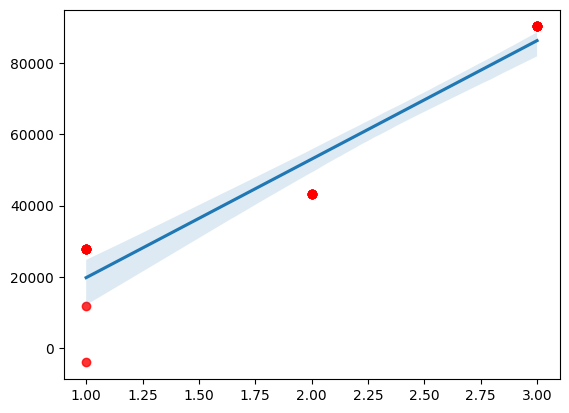

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(10.5)
sns.regplot (x=X_test[:,0], y=y_pred, scatter_kws={'color':'red'})
plt.show()

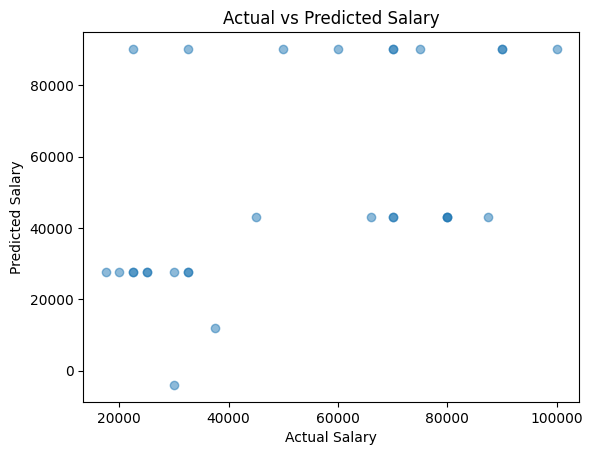

In [35]:
# plot the actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

In [36]:

# dump model
filename = 'linearRegression.pkl'
with open(filename, 'wb') as file:
    pickle.dump(lr, file)

